In [49]:
%matplotlib inline

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as ani
from matplotlib import rc

from IPython.display import HTML, Image

from Perceptron import perceptron

In [51]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

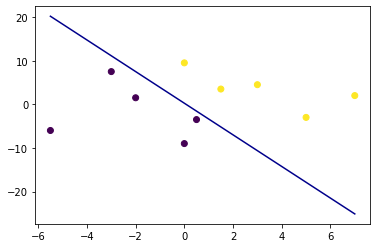

In [52]:
xs = np.array([[1.5, 3.5], [5, -3], [7, 2], [0, 9.5], [3, 4.5],
               [0.5, -3.5], [-2, 1.5], [-5.5, -6], [0, -9], [-3, 7.5]])
ys = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1, -1])
th1, th0, tries = perceptron(xs, ys)
x1 = xs[:, 0]
x2 = xs[:, 1]
t = np.linspace(x1.min(), x1.max())
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x1, x2, c=ys)

ax.plot(t, -(th1[tries][0] * t + th0[tries]) / th1[tries][1], color='darkblue')
plt.show()

In [53]:
%%capture
fig, ax = plt.subplots()
ax.scatter(x1, x2, c=ys)
ax.set_title("Perceptron", )
x = np.linspace(x1.min(), x1.max())
y = np.linspace(x2.min(), x2.max())
line, = ax.plot(x, y)
ttl = ax.text(.6, 1.02, '', transform=ax.transAxes)

def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    ttl.set_text('')
    return line, ttl,


In [54]:
def animate(i):
    line.set_ydata(-(th1[i + 1][0] * x + th0[i + 1]) / th1[i + 1][1])  # update the data.
    ttl.set_text(str(i))
    return line, ttl,

In [55]:
answer = ani.FuncAnimation(
    fig, animate, frames=len(th1) - 1, init_func=init, interval=800, blit=True)

In [56]:
answer